#Importing libraries 

In [ ]:
#loading and importing libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix

#Importing dataset

In [ ]:
fetal_health=pd.read_csv('/content/drive/MyDrive/health_data/fetal_health.csv') #data loading 

In [ ]:
fetal_health.tail().T

,2121,2122,2123,2124,2125
baseline value,140.000,140.000,140.000,140.000,142.000
accelerations,0.000,0.001,0.001,0.001,0.002
fetal_movement,0.000,0.000,0.000,0.000,0.002
uterine_contractions,0.007,0.007,0.007,0.006,0.008
light_decelerations,0.000,0.000,0.000,0.000,0.000
severe_decelerations,0.000,0.000,0.000,0.000,0.000
prolongued_decelerations,0.000,0.000,0.000,0.000,0.000
abnormal_short_term_variability,79.000,78.000,79.000,78.000,74.000
mean_value_of_short_term_variability,0.200,0.400,0.400,0.400,0.400
percentage_of_time_with_abnormal_long_term_variability,25.000,22.000,20.000,27.000,36.000


#Data pre-processing

In [ ]:
fetal_health.isnull().sum() #checking null values and missing values in the dataset 

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

#Exploratory data analysis and statistical analysis 

In [ ]:
fetal_health.describe() #describing dataset

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


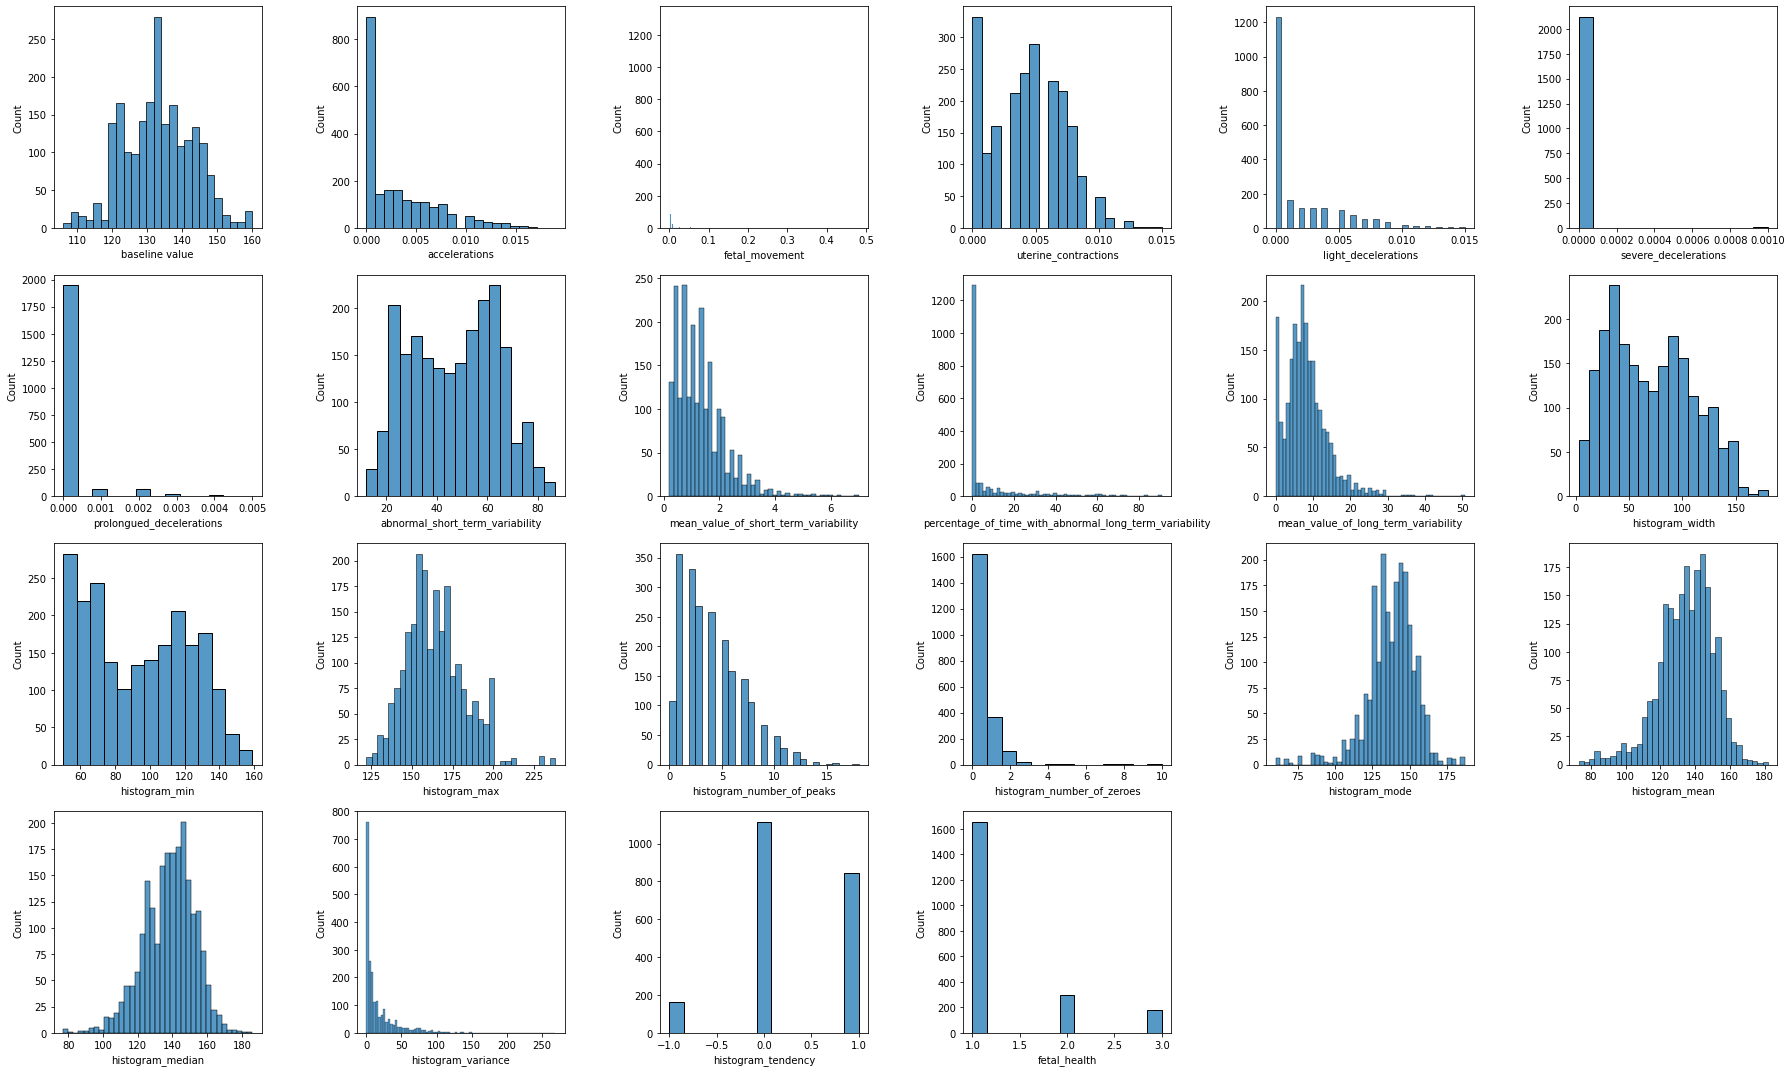

In [ ]:
#checking distribution of all the attributes 
plt.figure(figsize=(25, 15))
for val, col in enumerate(fetal_health.columns):
    plt.subplot(4, 6, val + 1)
    sns.histplot(data=fetal_health[col])
plt.tight_layout()
plt.show()

#Statistics/computation-based data analytics

In [ ]:
#!pip install dabl
import dabl

     |████████████████████████████████| 558 kB 14.5 MB/s 


/usr/local/lib/python3.7/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:17: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  "Since version 1.0, "


Target looks like classification
Linear Discriminant Analysis training set score: 0.739


[[<Figure size 1440x864 with 20 Axes>,
  <Figure size 1152x288 with 4 Axes>,
  <Figure size 1152x288 with 4 Axes>,
  <Figure size 288x288 with 1 Axes>],
 None]

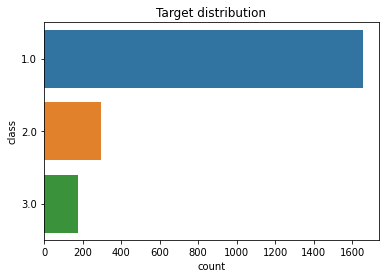

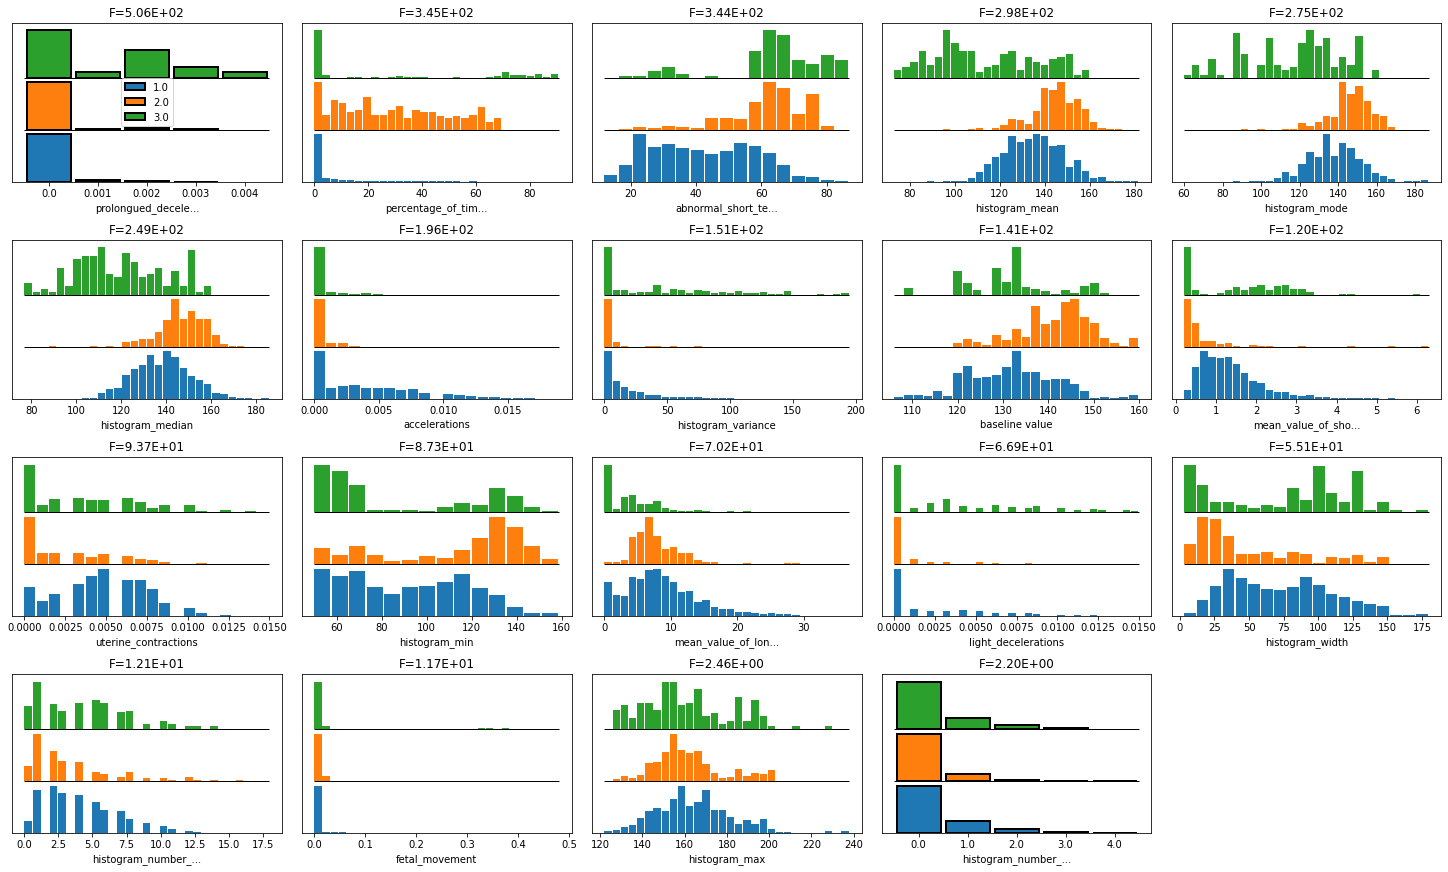

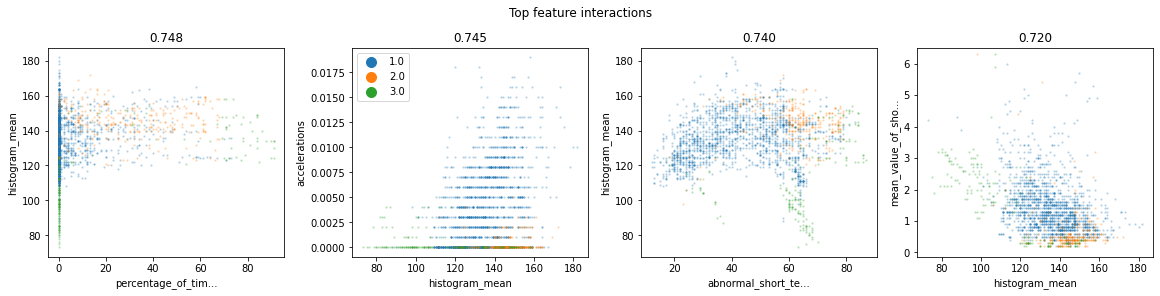

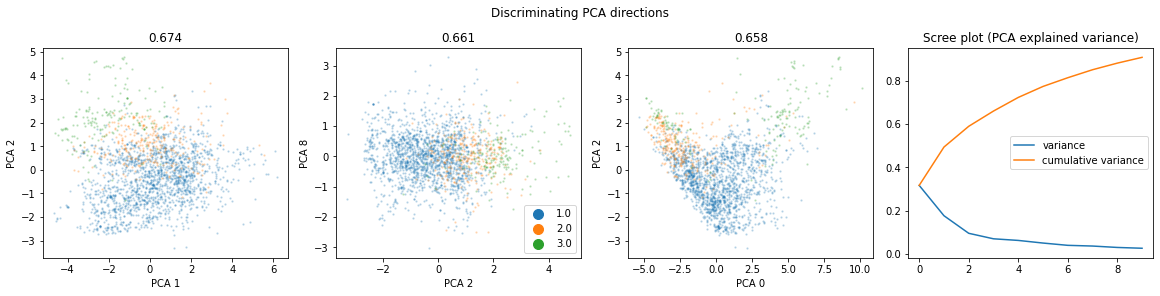

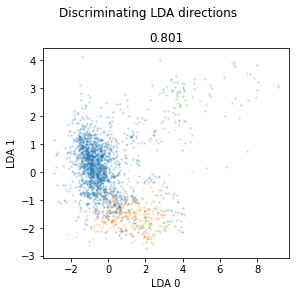

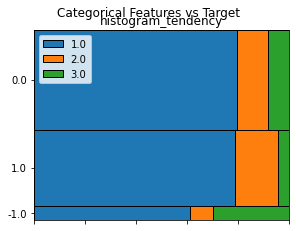

In [ ]:
dabl.plot(fetal_health, "fetal_health") #plotting all the possible visualization for all the attributes

#Machine learning models

In [ ]:
#splitting dataset 
healthx = fetal_health.drop(['fetal_health'], axis  = 1)
healthy = fetal_health['fetal_health']

In [ ]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(healthx,healthy,test_size = 0.25, random_state = 0)

#BaggingClassifier

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
model_BaggingClassifier=BaggingClassifier()

In [ ]:
model_BaggingClassifier.fit(X_Train, Y_Train)

BaggingClassifier()

In [ ]:
model_pred= model_BaggingClassifier.predict(X_Test)

#Evalution and prediciton on data using machine learning models

In [ ]:
print("Accuracy score:-", accuracy_score(model_pred, Y_Test))

Accuracy score:- 0.943609022556391


In [ ]:
print("Classification_report:-\n", classification_report(model_pred, Y_Test))

Classification_report:-
               precision    recall  f1-score   support

         1.0       0.99      0.95      0.97       425
         2.0       0.71      0.91      0.80        56
         3.0       0.94      0.92      0.93        51

    accuracy                           0.94       532
   macro avg       0.88      0.93      0.90       532
weighted avg       0.95      0.94      0.95       532



In [ ]:
print("confusion_matrix:-\n", confusion_matrix(model_pred, Y_Test))

confusion_matrix:-
 [[404  20   1]
 [  3  51   2]
 [  3   1  47]]
